# Analyzing Pricing Differences in Men's and Women's Zara Products

# Permissions

**Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).**

* [  ] YES - make available
* [ 'X' ] NO - keep private

# Names

- Michelle Shen
- Tracy Vu
- Amber Wang
- Yoyo Wu
- Elaine Zhou

# Abstract

This project entails an evaluation of price differences within datasets of gender-specific clothing to determine any substantial discrepancies for particular categories. Initially, we intended to focus on personal care products like razors, shaving creams, shampoos, and conditioners, with the goal of finding comparable prices for these items. However, as we developed the project, we shifted our attention to investigating pricing inequities in fashion, as it’s an area that has acquired comparatively less research consideration.

For this purpose, we leveraged a large dataset from the popular clothing company Zara. We chose Zara because of its widespread appeal to both men and women, ensuring similar demand across genders. Our analysis involved comparing prices of various types of apparel between the two genders, using metrics like means and standard deviations to quantify observed differences.

Overall, our findings show that men's clothing has a higher average price and standard deviation versus women's clothing. However, identifying significant pricing variations within certain categories remains inconclusive. This uncertainty stems from an unequal distribution of counts in our two datasets, highlighting the need for further examination and refinement in future analyses.

# Research Question

### How do gender-based pricing differences vary across different product categories in retail clothing?

- Is the price difference significant for male and female products in any of the clothing categories?
- If so, which clothing categories and which ones are more expensive?

Product categories:
- Apparel & Accessories (Shirts, Jeans, Jackets, etc.)

Retail clothing: 
- Zara
    



## Background and Prior Work


Recent studies have focused on the "pink tax," examining whether systematic gender-based pricing discrepancies exist for consumer products marketed to women versus men. However, findings on whether such pricing differences actually occur, especially online, have been contradictory.

For instance, a 2018 Government Accountability Office report <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) did not find consistent evidence of significant gender pricing differences overall across the products and brands included in their analysis.

In contrast, a more recent 2021 study <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) by the New York City Department of Consumer and Worker Protection did find clear pricing differences, with women’s and girls’ products costing 7% more on average than men’s and boys’ items.

These results indicate that more research is still needed to understand whether and how pricing may differ based on gender, particularly in online shopping where  price transparency and comparison should be easier. Isolating pricing differences between highly similar or identical products targeted at men versus women could provide clearer insight.



1. <a name="cite_note-1"></a> [^](#cite_ref-1) U.S. Government Accountability Office. (2018). Gender-Related Price Differences for Goods and Services. https://www.gao.gov/assets/gao-18-500.pdf
2. <a name="cite_note-2"></a> [^](#cite_ref-2) NYC Department of Consumer and Worker Protection. (2021). From Cradle to Cane: The Cost of Being a Female Consumer. . https://www1.nyc.gov/assets/dca/downloads/pdf/partners/Study-of-Gender-Pricing-in-NYC.pdf 


# Hypothesis



#### Our hypothesis is that gender-based price disparities are significant in the categories investigated and that women pay more than men for functionally identical products in different clothing categories.

We predict that this difference occurs because social norms expect women to put more effort into self-maintenance and appearance which leads to women being usually willing to pay more for products related to beauty. This inclines the sellers to increase the price of women’s products.   


# Data

## Data overview

We will be using a dataset from the Zara Clothing Collection which contains information for men's and women’s fashion items in order to answer our research question. You can click on this [link](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing) to find the data. 

In [1]:
# import statements
import pandas as pd
import numpy as numpy

In [2]:
# methods to help clean data

# return product type depending on which file is being read
def getProductType(file):
    switch_dict = {
        0: 'blazers',
        1: 'jackets',
        2: 'jeans',
        3: 'shirts',
        4: 'shoes',
        5: 'trousers'
    }
    return switch_dict.get(file, 'Other')

# import the files and add the product type to a new 'product_type' column
def import_and_add_product_type(files):
    df = pd.DataFrame()
    i = 0
    df['product_type'] = ''
    for file in files:
        new_file = pd.read_csv(files[i])
        start_index = len(df)
        end_index = start_index + len(new_file)
        product_type = getProductType(i)
        df = pd.concat([df, new_file], ignore_index=True)
        df.loc[start_index:(end_index - 1), 'product_type'] = product_type
        i += 1
        
    df = df.reset_index(drop = True)
    return df

## Dataset #1: Men's Clothing
- Total number of observations: 563
- Dataset Name: Mens/ Womens Zara Products
- Link to dataset: [https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing)
- Description: We will be using a dataset from the Zara Clothing Collection which contains information for men’s fashion items. This dataset includes categories which are listed as follows: shirts, pants, trousers, shorts, suits, jackets, accessories, etc. The features that this specific dataset contains include the following: product name, a brief textual description of the clothing item, images, and price. There were 563 individual observations recorded with 7 columns, but 4 columns were dropped during data cleaning, as they did not contain relevant information in regards to answering our research question.


In [15]:
# list of file names
men_files = ['../data/BLAZERS_men.csv', '../data/JACKETS_men.csv', '../data/JEANS_men.csv',
            '../data/SHIRTS_men.csv', '../data/SHOES_men.csv', '../data/TROUSERS_men.csv']

# import data add a 'product_type' column
men_data = import_and_add_product_type(men_files)

# look at the number of observations
print(men_data.shape)

men_data.head(10)

(563, 7)


product_type  Unnamed: 0                             product_name  \
0      blazers         0.0                             BASIC BLAZER   
1      blazers         4.0  100% WOOL SUIT BLAZER - LIMITED EDITION   
2      blazers         5.0                    100% WOOL SUIT BLAZER   
3      blazers         9.0          100% WOOL PINSTRIPE SUIT BLAZER   
4      blazers        11.0                100% WOOL OVERSIZE BLAZER   
5      blazers        13.0                     SLIM FIT SUIT BLAZER   
6      blazers        23.0                      CHECKED SUIT BLAZER   
7      blazers        24.0                      CHECKED SUIT BLAZER   
8      blazers        39.0                              SUIT BLAZER   
9      blazers        41.0                      BLAZER WITH POCKETS   

                                                link  \
0  https://www.zara.com/in/en/basic-blazer-p05899...   
1  https://www.zara.com/in/en/100-wool-suit-blaze...   
2  https://www.zara.com/in/en/100-wool-suit-blaze...   
3  https://www.zara.com/in/en/100-wool-pinstripe-...   
4  https://www.zara.com/in/en/100-wool-oversize-b...   
5  https://www.zara.com/in/en/slim-fit-suit-blaze...   
6  https://www.zara.com/in/en/checked-suit-blazer...   
7  https://www.zara.com/in/en/checked-suit-blazer...   
8  https://www.zara.com/in/en/suit-blazer-p056232...   
9  https://www.zara.com/in/en/blazer-with-pockets...   

                                      product_images        price  \
0  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 7,590.00   
1  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 11,990.00   
2  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 11,990.00   
3  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 11,990.00   
4  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 11,990.00   
5  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 5,990.00   
6  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 9,590.00   
7  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 9,590.00   
8  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 9,590.00   
9  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 8,590.00   

                                             details  
0  Straight-fit blazer with a notched lapel colla...  
1  Blazer made of wool. Peak lapel collar and lon...  
2  Blazer made of Italian wool fabric. Notch lape...  
3  Straight fit blazer made of Italian wool fabri...  
4  Oversize blazer made of wool. Notched lapel co...  
5  Blazer with a notched lapel collar. Long sleev...  
6  Straight fit blazer with a notched lapel colla...  
7  Regular-fit blazer with a notched lapel collar...  
8  Straight fit blazer with a notched lapel colla...  
9  Relaxed fit blazer with a pointed lapel collar...

As you can see, there were 563 individual observations recorded with 7 columns, but we will drop the following columns as they are not useful in the process of comparing prices:
- Unnamed: 0
- link
- product_images
- details

In [6]:
# drop unnecessary columns
men_data = men_data.drop(columns = ['Unnamed: 0', 'link', ' product_images', 'details'])

# convert categorical variables to lowercase
men_data = men_data.apply(lambda x: x.lower() if isinstance(x, str) else x)

# check for missing values
print(men_data.isna().sum())

product_type    0
product_name    0
price           0
dtype: int64


There are no missing values!

## Dataset #2: Women's Clothing
- Total number of observations: 796
- Dataset Name: Mens/ Womens Zara Products
- Link to dataset: [https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing](https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing)
- Description: We will be using a second dataset from the Zara Clothing Collection which contains information for women’s fashion items. Categories within this dataset include: shirts, pants, trousers, shorts/ skorts, dresses, jackets, accessories, etc. The features that this specific dataset contains include the following: product name, a brief textual description of the clothing item, images, and price. There were 796 individual observations recorded with 7 columns, but 4 columns were also dropped as they did not contain relevant information in regards to answering our research question.


In [16]:
# list of file names
women_files = ['../data/BLAZERS_women.csv', '../data/JACKETS_women.csv', '../data/JEANS_women.csv',
                '../data/SHIRTS_women.csv', '../data/SHOES_women.csv', '../data/TROUSERS_women.csv']

# import data and add a 'product_type' column
women_data = import_and_add_product_type(women_files)

# look at the number of observations
print(women_data.shape)

women_data.head(10)

(796, 7)


product_type  Unnamed: 0                     Product_Name  \
0      blazers         0.0  TAILORED DOUBLE-BREASTED BLAZER   
1      blazers         1.0           STRIPE TEXTURED BLAZER   
2      blazers         2.0               TAILORED WAISTCOAT   
3      blazers         3.0                  STRAIGHT BLAZER   
4      blazers         4.0    BLAZER WITH ROLLED-UP SLEEVES   
5      blazers         5.0        HIGH NECK TEXTURED BLAZER   
6      blazers         6.0         SHORT TAILORED WAISTCOAT   
7      blazers         7.0         FITTED BLAZER WITH SEAMS   
8      blazers        10.0            LONG BLAZER WITH BELT   
9      blazers        11.0     CROPPED BLAZER WITH FEATHERS   

                                                Link  \
0  https://www.zara.com/in/en/tailored-double-bre...   
1  https://www.zara.com/in/en/stripe-textured-bla...   
2  https://www.zara.com/in/en/tailored-waistcoat-...   
3  https://www.zara.com/in/en/straight-blazer-p09...   
4  https://www.zara.com/in/en/blazer-with-rolled-...   
5  https://www.zara.com/in/en/high-neck-textured-...   
6  https://www.zara.com/in/en/short-tailored-wais...   
7  https://www.zara.com/in/en/fitted-blazer-with-...   
8  https://www.zara.com/in/en/long-blazer-with-be...   
9  https://www.zara.com/in/en/cropped-blazer-with...   

                                       Product_Image        Price  \
0  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 5,590.00   
1  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 5,990.00   
2  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 2,990.00   
3  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 4,990.00   
4  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 4,490.00   
5  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 5,990.00   
6  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 2,990.00   
7  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 5,990.00   
8  [{'https://static.zara.net/photos///2023/I/0/1...   ₹ 7,590.00   
9  [{'https://static.zara.net/photos///2023/I/0/1...  ₹ 11,990.00   

                                             Details  
0  Blazer featuring a lapel collar with long slee...  
1  Lapelless blazer with long sleeves and shoulde...  
2  Sleeveless waistcoat with a V-neck. Front jett...  
3  Blazer featuring a lapel collar with long slee...  
4  Open blazer with a lapel collar and padded sho...  
5  Blazer featuring a high neck and long sleeves ...  
6  V-neck waistcoat. Featuring false welt pockets...  
7  Blazer with a lapel collar and long sleeves wi...  
8  Blazer with a lapel collar, long sleeves and s...  
9  Cropped blazer featuring a lapel collar and lo...

As you can see, there were 796 individual observations recorded with 7 columns, but we will drop the following columns as they are not useful in the process of comparing prices:
- Unnamed: 0
- Link
- Product_Image
- Details

In [8]:
# drop unnecessary columns
women_data = women_data.drop(columns = ['Unnamed: 0', 'Link', 'Product_Image', 'Details'])

# convert categorical variables to lowercase
women_data = women_data.apply(lambda x: x.lower() if isinstance(x, str) else x)
women_data.columns = women_data.columns.str.lower()

# check for missing values
print(women_data.isna().sum())

product_type    0
product_name    2
price           0
dtype: int64


There are two missing values in the Product_Name column, so let's see what entries those are.

In [9]:
# finding rows with missing values
print(women_data[women_data['product_name'].isna()])

    product_type product_name       price
590        shoes          NaN  ₹ 2,890.00
645        shoes          NaN  ₹ 5,590.00


Since only the product name is missing, we will just replace the name with "shoes" which is the product type, as this does not affect the analysis of the price.

In [10]:
# set the missing product_name to 'trousers'
women_data[women_data['product_name'].isna()] = 'shoes'

# check to ensure no more missing values
print(women_data.isna().sum())

product_type    0
product_name    0
price           0
dtype: int64


## Price Conversion
Now, we have to convert the rupees into U.S. dollars. The conversion rate is 1 rupee = 0.012 USD.

In [11]:
# delete rupee symbol and comma
men_data['price'] = pd.to_numeric(men_data['price'].str.replace('[^\d.]', '', regex=True))
women_data['price'] = pd.to_numeric(women_data['price'].str.replace('[^\d.]', '', regex=True))

# apply the conversion between rupees and USD
men_data['price'] = men_data['price'].apply(lambda x: x * 0.012)
women_data['price'] = women_data['price'].apply(lambda x: x * 0.012)

# rename the 'price' column to 'price_dollars'
men_data = men_data.rename(columns={'price': 'price_dollars'})
women_data = women_data.rename(columns={'price': 'price_dollars'})

Finally, we can display the data.

In [12]:
men_data.head(10)

product_type                             product_name  price_dollars
0      blazers                             BASIC BLAZER          91.08
1      blazers  100% WOOL SUIT BLAZER - LIMITED EDITION         143.88
2      blazers                    100% WOOL SUIT BLAZER         143.88
3      blazers          100% WOOL PINSTRIPE SUIT BLAZER         143.88
4      blazers                100% WOOL OVERSIZE BLAZER         143.88
5      blazers                     SLIM FIT SUIT BLAZER          71.88
6      blazers                      CHECKED SUIT BLAZER         115.08
7      blazers                      CHECKED SUIT BLAZER         115.08
8      blazers                              SUIT BLAZER         115.08
9      blazers                      BLAZER WITH POCKETS         103.08

In [ ]:
women_data.head(10)

product_type                     product_name  price_dollars
0      blazers  TAILORED DOUBLE-BREASTED BLAZER          67.08
1      blazers           STRIPE TEXTURED BLAZER          71.88
2      blazers               TAILORED WAISTCOAT          35.88
3      blazers                  STRAIGHT BLAZER          59.88
4      blazers    BLAZER WITH ROLLED-UP SLEEVES          53.88
5      blazers        HIGH NECK TEXTURED BLAZER          71.88
6      blazers         SHORT TAILORED WAISTCOAT          35.88
7      blazers         FITTED BLAZER WITH SEAMS          71.88
8      blazers            LONG BLAZER WITH BELT          91.08
9      blazers     CROPPED BLAZER WITH FEATHERS         143.88

# Results

## Exploratory Data Analysis


### Data Overview

First, let's look at the summary of our data sets to see the overall distribution of price of men's and women's fashion items in Zara.

In [ ]:
# import plotting statements
import seaborn as sns
import matplotlib.pyplot as plt

print(men_data.describe(),'\n','\n', women_data.describe())

       price_dollars
count     563.000000
mean       57.673961
std        25.122417
min        17.880000
25%        39.480000
50%        47.880000
75%        59.880000
max       191.880000 
 
        price_dollars
count     793.000000
mean       50.370794
std        18.846724
min        23.880000
25%        35.880000
50%        39.480000
75%        59.880000
max       155.880000


In [ ]:
print(men_data['price_dollars'].mean(),women_data['price_dollars'].mean())
print(men_data['price_dollars'].std(),women_data['price_dollars'].std())

57.67396092362344 50.3707944514502
25.12241698863356 18.846724348974675


From the summary of data we have above, the price of clothing items for men has a higher mean as well as more varience in its distribution. This may suggest that men actually pays more for clothing items than women. 

However, there are two things in the data to be considered. 

* For the comparable categories we selected, while they are functionally similar, the total number of women's clothing items is greater than men's by around 40%. This suggests that the brand, at least in the categories selected, caters more towards its female customers and is therefore more likely to provide female items in an affordable and controlled price range than male ones. 



* Since we have different counts and different distribution across categories for the men and women datasets, it is important to determine if this result is skewed due to a particular category in which the male version is offered in more counts and higher price than the female version.


Let's first look the breakdown of the distribution of price in each of the clothing categories.

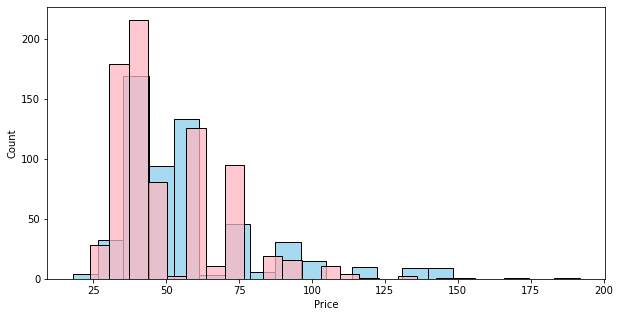

In [ ]:
# distribution of the price of all of men and women's clothing items 
plt.figure(figsize=(10,5))
sns.histplot(men_data['price_dollars'], bins=20, color='skyblue')
sns.histplot(women_data['price_dollars'], bins=20, color='lightpink')
plt.xlabel('Price')
plt.show()

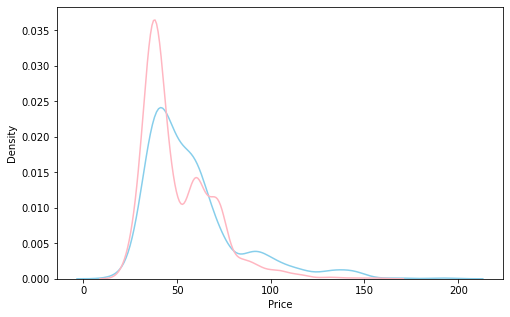

In [ ]:
# densityplot of the price of all of men and women's clothing items 
plt.figure(figsize=(8,5))
sns.kdeplot(men_data['price_dollars'], color='skyblue')
sns.kdeplot(women_data['price_dollars'], color='lightpink')
plt.xlabel('Price')
plt.show()

Looking at the above plots, we can see that while the prices for men and women are both densely distributed below 50 dollars, more women's items are within the lower range. 


There is drastic decrease in the density of female items' price distribution as it approaches 50 dollars while the dip in male items' distribution is much less apparent with quite a few of them around 50 to 60 dollars. This is in accordance with what we presumed previously regarding the brand. 


#### Inferential Tests

As our sample and datasets are non-parametric data, let's apply the Mann-Whitney U test to further investigate our prior findings with the following null and alternative hypothesis

H<sub>0</sub>= There is no diffference for the price distribution of men and women's clothing items.

H<sub>a</sub>= Men's clothing items have a higher price distribution than women's. 

In [ ]:
from scipy.stats import mannwhitneyu

Stat, p= mannwhitneyu(men_data['price_dollars'],women_data['price_dollars'],alternative='greater')
print('p-value=',p)

p-value= 9.071820668370416e-10


This is strong statistical proof to reject H<sub>0</sub> and suggest that the prices of our selected categories of male and female clothings as a whole do not represent the same population and that there is indeed a price difference of men's clothing items being more expensive.

While this already goes against our initial prediction, one of the things we are also trying to investigate in our research question is the distribution of such differences across different categories which may help us understand what's leading such a difference. 

### Category Analysis


Now, let's look at the distribution of individual categories.

In [ ]:
# the distribution of the prices of blazers
men_blazers = men_data[men_data['product_type'] == 'blazers']
women_blazers = women_data[women_data['product_type'] == 'blazers']
# the distribution of the prices of jackets
men_jackets = men_data[men_data['product_type'] == 'jackets']
women_jackets = women_data[women_data['product_type'] == 'jackets']
# the distribution of the prices of jeans
men_jeans = men_data[men_data['product_type'] == 'jeans']
women_jeans = women_data[women_data['product_type'] == 'jeans']
# the distribution of the prices of shirts
men_shirts = men_data[men_data['product_type'] == 'shirts']
women_shirts = women_data[women_data['product_type'] == 'shirts']
# the distribution of the prices of shoes
men_shoes = men_data[men_data['product_type'] == 'shoes']
women_shoes = women_data[women_data['product_type'] == 'shoes']
# the distribution of the prices of trousers
men_trousers = men_data[men_data['product_type'] == 'trousers']
women_trousers = women_data[women_data['product_type'] == 'trousers']

Stat_bz, p_bz= mannwhitneyu(men_blazers['price_dollars'],women_blazers['price_dollars'])
Stat_jk, p_jk= mannwhitneyu(men_jackets['price_dollars'],women_jackets['price_dollars'])
Stat_jn, p_jn= mannwhitneyu(men_jeans['price_dollars'],women_jeans['price_dollars'])
Stat_st, p_st= mannwhitneyu(men_shirts['price_dollars'],women_shirts['price_dollars'])
Stat_sh, p_sh= mannwhitneyu(men_shoes['price_dollars'],women_shoes['price_dollars'])
Stat_tr, p_tr= mannwhitneyu(men_trousers['price_dollars'],women_trousers['price_dollars'])

#take a look at p-value across categories
p_val=pd.DataFrame([p_bz,p_jk,p_jn,p_st,p_sh,p_tr])
p_val.index=['blazers','jackets','jeans','shirts','shoes','trousers']
p_val.columns=['p-val']
print(p_val)


                 p-val
blazers   2.358819e-06
jackets   2.524207e-05
jeans     2.131487e-02
shirts    1.127488e-13
shoes     4.609696e-02
trousers  2.369563e-10


The DataFrame above shows the p-value of the test on each individual categories. At a glance, all categories seem to be statistically significant in their differences except for jeans and shoes. This helps separate our categories into two groups. 

Let's look at the distribution of exceptions below in more detail. 

**Starting with jeans:**

In [ ]:
print(men_jeans.describe(),'\n','\n', women_jeans.describe())

       price_dollars
count      15.000000
mean       53.960000
std        13.465893
min        29.880000
25%        43.680000
50%        59.880000
75%        59.880000
max        71.880000 
 
        price_dollars
count      15.000000
mean       42.600000
std         9.080214
min        35.880000
25%        37.680000
50%        39.480000
75%        39.480000
max        59.880000


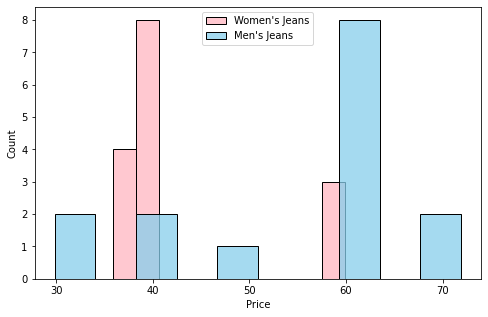

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=women_jeans, x='price_dollars', bins=10, color='lightpink', label="Women's Jeans")
sns.histplot(data=men_jeans, x='price_dollars', bins=10, color='skyblue', label="Men's Jeans")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that due to the small count of data, both men and women's price distributions are  irregular in their clusters and peaks and does not exhibit a clear pattern. Overall, men's jeans seem to have more counts in the upper price range than women's jeans and that the common price range for men's jeans is higher than women's.

We can see more of this disparity in the boxplot below.

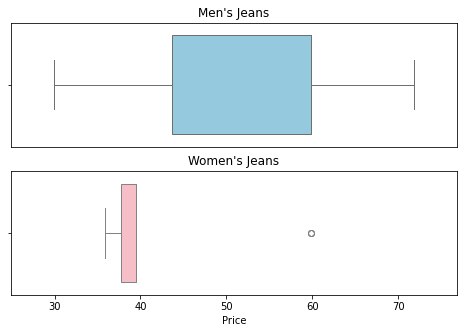

The range of the price of men's jeans is 42.0
The range of the price of women's jeans is 24.0


In [ ]:
# price range of jeans
price_min = min(men_jeans['price_dollars'].min(), women_jeans['price_dollars'].min())-5
price_max = max(men_jeans['price_dollars'].max(), women_jeans['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_jeans, x='price_dollars', color='skyblue')
plt.title("Men's Jeans")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_jeans, x='price_dollars', color='lightpink')
plt.title("Women's Jeans")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()
print("The range of the price of men's jeans is " + str(men_jeans['price_dollars'].max()-men_jeans['price_dollars'].min()))
print("The range of the price of women's jeans is " + str(women_jeans['price_dollars'].max()-women_jeans['price_dollars'].min()))

From the boxplot, the differences between the two datasets are even more apparent especially in their price range. The p-value, therefore, appears to be inconclusive in determining the real price differences for this category due to the small dataset which also limits any further analysis.  

**As the price distribution of jeans turn out to be inconclusive due to small data size, let's look at shoes under similar approach:**

In [ ]:
print(men_shoes.describe(),'\n','\n', women_shoes.describe())

       price_dollars
count     166.000000
mean       59.865542
std        26.011350
min        17.880000
25%        39.480000
50%        55.080000
75%        71.880000
max       143.880000 
 
        price_dollars
count     281.000000
mean       53.487117
std        19.300435
min        23.880000
25%        39.480000
50%        47.880000
75%        67.080000
max       155.880000


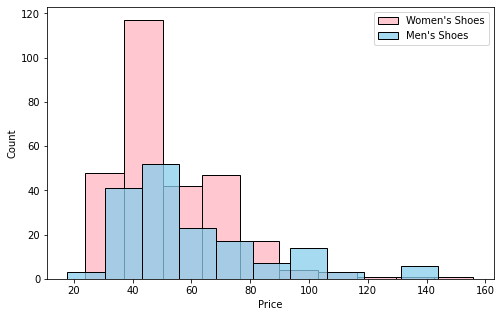

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=women_shoes, x='price_dollars', bins=10, color='lightpink', label="Women's Shoes")
sns.histplot(data=men_shoes, x='price_dollars', bins=10, color='skyblue', label="Men's Shoes")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that the price distributions of both women's and men's shoes are positively skewed and looks more parametric in its shape. The central tendency of both women's and men's shoes appears similar, reflected in their similar histogram shapes, even though women's shoes have a higher count from its overall bigger dataset.

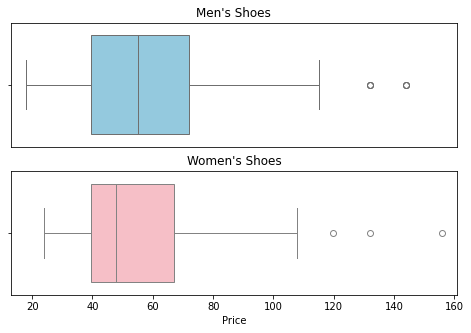

The range of the price of men's shoes is 126.0
The range of the price of women's shoes is 132.0


In [ ]:
# price range of shoes
price_min = min(men_shoes['price_dollars'].min(), women_shoes['price_dollars'].min())-5
price_max = max(men_shoes['price_dollars'].max(), women_shoes['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_shoes, x='price_dollars', color='skyblue')
plt.title("Men's Shoes")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_shoes, x='price_dollars', color='lightpink')
plt.title("Women's Shoes")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

print("The range of the price of men's shoes is " + str(men_shoes['price_dollars'].max()-men_shoes['price_dollars'].min()))
print("The range of the price of women's shoes is " + str(women_shoes['price_dollars'].max()-women_shoes['price_dollars'].min()))

From the boxplot, we can see that while there are outliers and price range differences for both men's and women's shoes, the overall distribution of prices appears more similar when compared to the plot we observed previously. This is more in accordance with what we would predict from its p-value which shows no statistically significant differences between the price distribution of men and women's shoes. 


After looking at the above categories that, suggested by their p-value, do not show significant price difference, we are able to identify one as inconclusive and one as showing truly no difference for the price distribution between men and women's shoes. 


**Now let's look at the other categories, starting with blazers.**

In [ ]:
print(men_blazers.describe(),'\n','\n', women_blazers.describe())

       price_dollars
count      22.000000
mean      105.916364
std        31.819230
min        47.880000
25%        76.680000
50%       115.080000
75%       131.880000
max       143.880000 
 
        price_dollars
count      67.000000
mean       65.288955
std        21.629649
min        35.880000
25%        50.880000
50%        59.880000
75%        71.880000
max       143.880000


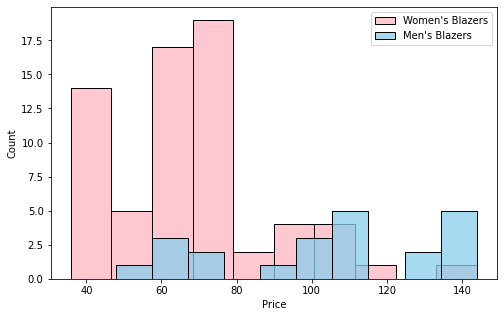

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=women_blazers, x='price_dollars', bins=10, color='lightpink', label="Women's Blazers")
sns.histplot(data=men_blazers, x='price_dollars', bins=10, color='skyblue', label="Men's Blazers")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that the price distribution of women's blazers shows a positive skew, indicating that there are relatively fewer high-priced items. In contrast, the distribution for men's blazers appears more uniform, suggesting a relatively even spread of higher prices in comparison to women's. The distance between the two group can be further seen in comparison to shoes whose mean differ by 6 while blazers differ by 40.

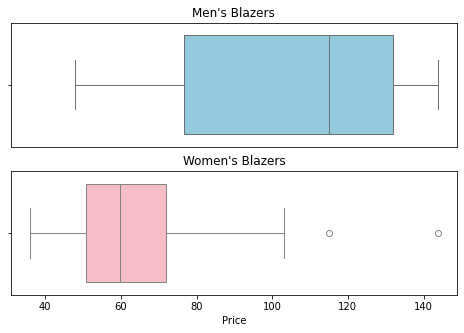

The range of the price of men's blazers is 96.0
The range of the price of women's blazers is 108.0


In [ ]:
# price range of blazers
price_min = min(men_blazers['price_dollars'].min(), women_blazers['price_dollars'].min())-5
price_max = max(men_blazers['price_dollars'].max(), women_blazers['price_dollars'].max())+5

plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_blazers, x='price_dollars', color='skyblue')
plt.title("Men's Blazers")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_blazers, x='price_dollars', color='lightpink')
plt.title("Women's Blazers")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()


print("The range of the price of men's blazers is " + str(men_blazers['price_dollars'].max()-men_blazers['price_dollars'].min()))
print("The range of the price of women's blazers is " + str(women_blazers['price_dollars'].max()-women_blazers['price_dollars'].min()))


Looking at the boxplot above, the shape of distribution and differences in price range have more resemblance with jeans than shoes, suggesting small and unequal data size to be contributing more to the p-value thant the statistical differences it indicates. 

**Jackets:**

In [ ]:
print(men_jackets.describe(),'\n','\n', women_jackets.describe())

       price_dollars
count      66.000000
mean       77.061818
std        27.602937
min        35.880000
25%        59.880000
50%        71.880000
75%        91.080000
max       191.880000 
 
        price_dollars
count     113.000000
mean       61.186195
std        19.160153
min        23.880000
25%        47.880000
50%        59.880000
75%        71.880000
max       131.880000


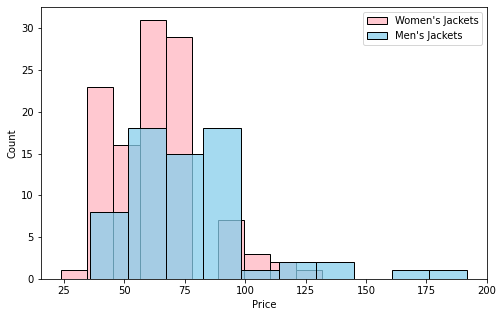

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=women_jackets, x='price_dollars', bins=10, color='lightpink', label="Women's Jackets")
sns.histplot(data=men_jackets, x='price_dollars', bins=10, color='skyblue', label="Men's Jackets")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that the price distribution of both women's and men's jackets are positively skewed, indicating that the majority of jackets have low prices. Yet we can also note that there are a higher count for higher-priced items in men's jackets than women's.

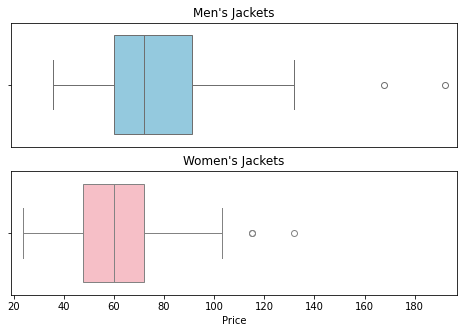

The range of the price of men's jackets is 156.0
The range of the price of women's jackets is 108.0


In [ ]:
# price range of jackets
price_min = min(men_jackets['price_dollars'].min(), women_jackets['price_dollars'].min())-5
price_max = max(men_jackets['price_dollars'].max(), women_jackets['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_jackets, x='price_dollars', color='skyblue')
plt.title("Men's Jackets")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_jackets, x='price_dollars', color='lightpink')
plt.title("Women's Jackets")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

print("The range of the price of men's jackets is " + str(men_jackets['price_dollars'].max()-men_jackets['price_dollars'].min()))
print("The range of the price of women's jackets is " + str(women_jackets['price_dollars'].max()-women_jackets['price_dollars'].min()))

From the boxplot, we can see that both women's and men's jackets have 2 outliers that  are even higher for men than women. The price range for men's jackets are accordingly larger.  

**Shirts:**

In [ ]:
print(men_shirts.describe(),'\n','\n', women_shirts.describe())

       price_dollars
count     175.000000
mean       45.774857
std        14.719005
min        23.880000
25%        39.480000
50%        39.480000
75%        47.880000
max       131.880000 
 
        price_dollars
count     210.000000
mean       40.440000
std        11.624241
min        23.880000
25%        35.880000
50%        37.680000
75%        39.480000
max       115.080000


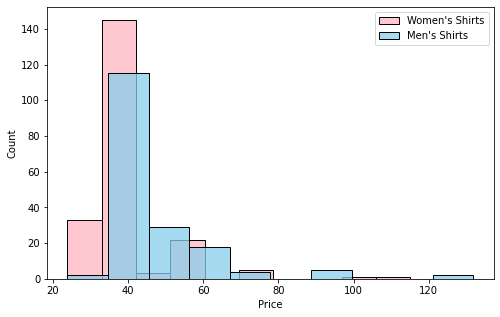

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=women_shirts, x='price_dollars', bins=10, color='lightpink', label="Women's Shirts")
sns.histplot(data=men_shirts, x='price_dollars', bins=10, color='skyblue', label="Men's Shirts")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that the shape of price distribution for both women's and men's shirts show a positive skew and a long right tail of a small number of items with far higher price than the majority. Let's better identify those items using boxplot below. 


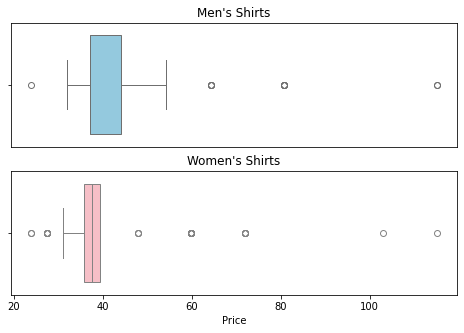

The range of the price of men's shirts is 108.0
The range of the price of women's shirts is 91.2


In [ ]:
# price range of shirts

plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_shirts, x='price_dollars', color='skyblue')
plt.title("Men's Shirts")
plt.xlabel('')
plt.xticks([])

plt.subplot(2, 1, 2)
sns.boxplot(data=women_shirts, x='price_dollars', color='lightpink')
plt.title("Women's Shirts")
plt.xlabel('Price')

plt.show()
print("The range of the price of men's shirts is " + str(men_shirts['price_dollars'].max()-men_shirts['price_dollars'].min()))
print("The range of the price of women's shirts is " + str(women_shirts['price_dollars'].max()-women_shirts['price_dollars'].min()))


From the boxplot, we can see that there are many outliers for both men's and women's shirts with both exceptionally high and low prices. Women's shirts, in particular, have a greater number of outliers compared to men's due to the higher count number. We can also see that the range of the price of men's shirts to be larger than women's. 

In the context of clothing stores, these statistical outliers represent individual cases of clothing items that are the combined product of marketing strategies and artistical pursuit instead of everyday purchase. 

**Trousers:**

In [ ]:
print(men_trousers.describe(),'\n','\n', women_trousers.describe())

       price_dollars
count     119.000000
mean       52.911933
std        15.279320
min        31.080000
25%        39.480000
50%        47.880000
75%        59.880000
max       143.880000 
 
        price_dollars
count     107.000000
mean       42.003364
std        12.155149
min        23.880000
25%        35.880000
50%        39.480000
75%        47.880000
max        91.080000


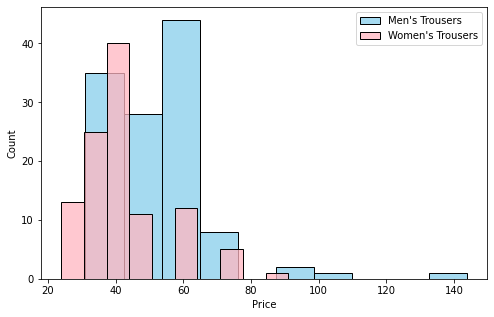

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=men_trousers, x='price_dollars', bins=10, color='skyblue', label="Men's Trousers")
sns.histplot(data=women_trousers, x='price_dollars', bins=10, color='lightpink', label="Women's Trousers")

plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

plt.show()

From the histogram, we can see that the price distribution of both men's and women's trousers can be considered positively skewed, with women's trousers having more counts in the lower-priced range. Men's trousers also show higher price in terms of central tendency than women's, the former around 60 and the latter around 40. 

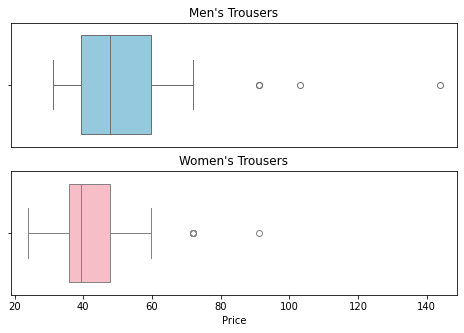

The range of the price of men's trousers is 112.8
The range of the price of women's trousers is 67.2


In [ ]:
# price range of trousers
price_min = min(men_trousers['price_dollars'].min(), women_trousers['price_dollars'].min())-5
price_max = max(men_trousers['price_dollars'].max(), women_trousers['price_dollars'].max())+5


plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
sns.boxplot(data=men_trousers, x='price_dollars', color='skyblue')
plt.title("Men's Trousers")
plt.xlabel('')
plt.xticks([])
plt.xlim(price_min, price_max)

plt.subplot(2, 1, 2)
sns.boxplot(data=women_trousers, x='price_dollars', color='lightpink')
plt.title("Women's Trousers")
plt.xlim(price_min, price_max)
plt.xlabel('Price')

plt.show()

print("The range of the price of men's trousers is " + str(men_trousers['price_dollars'].max()-men_trousers['price_dollars'].min()))
print("The range of the price of women's trousers is " + str(women_trousers['price_dollars'].max()-women_trousers['price_dollars'].min()))

From the boxplot, we can see that there are outliers for both men's and women's trousers, with men's trousers having 1 more outlier than women's. We can also see that the range of the price of men's shoes is larger than women's.

After looking at the above categories, we identified two categories to be inconclusive in analyzing their price distribution differences due to small counts of data, jeans and blazers, which is most likely due to the items overlapping with trousers and jackets. 

With the remaining categories: jackets, shirts, trousers, and shoes, shoes are the only category that show no statistical significant differences between men and women's price distributions. With the three remaining categories, aside from all showing statistical significance that men's items have a higher price distribution than women's, they also show a higher variance and larger price range for men's item than women's. This is supports what we raised earlier regarding the context of the brand we are investigating and how women's items are provided more in a controlled and affordable pricing. 

Based on the commonality we found between the three categories, lastly, let's take a look at how the mean, range and variance change between each categories and between the two genders by putting all the data together.

In [ ]:
# combine men and women's data together 
men_data['gender'] = 'men'
women_data['gender'] = 'women'

combined_data = pd.concat([men_data, women_data])

Text(0, 0.5, 'Mean Price')

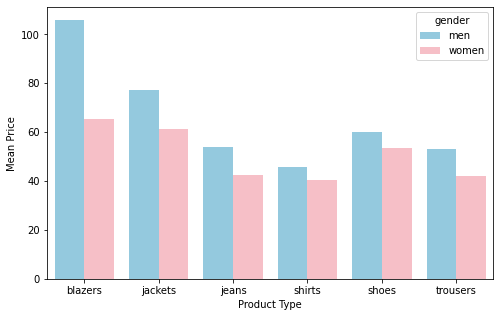

In [ ]:
# take a look at the mean price of each categories together
mean_price = combined_data.groupby(['product_type', 'gender'])['price_dollars'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=mean_price, x='product_type', y='price_dollars', hue='gender', errorbar=None,
           palette={'men': 'skyblue', 'women': 'lightpink'})

plt.xlabel('Product Type')
plt.ylabel('Mean Price')

From the barplot, we can see that overall, men's products have higher mean prices. While the mean prices of women's products are relatively close, men's products exhibit a greater degree of variability in their mean prices.

Text(0, 0.5, 'Standard Deviation')

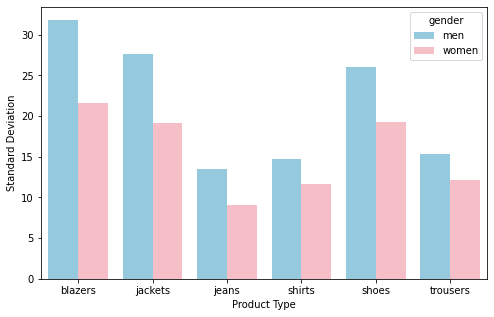

In [ ]:
# take a look at the standard deviation of each categories together
std = combined_data.groupby(['product_type', 'gender'])['price_dollars'].std().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=std, x='product_type', y='price_dollars', hue='gender', errorbar=None,
           palette={'men': 'skyblue', 'women': 'lightpink'})

plt.xlabel('Product Type')
plt.ylabel('Standard Deviation')


From the barplot for standard deviation across categories, it is clear that all men's items have higher standard deviation which indicates more outliers and more variance in their price which is not the norm for consumer products in fast fashion.

Text(0, 0.5, 'Price Range')

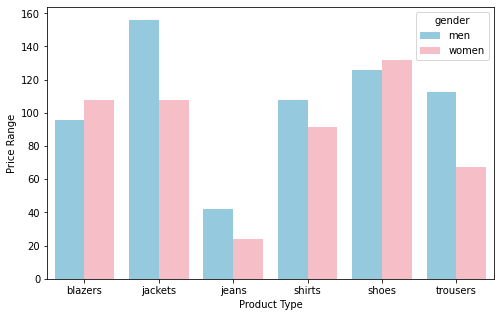

In [ ]:
# take a look at the price range of each categories together
price_range = combined_data.groupby(['product_type', 'gender'])['price_dollars'].agg(['min', 'max']).reset_index()
price_range['price_range'] = price_range['max'] - price_range['min']

plt.figure(figsize=(8,5))
sns.barplot(data=price_range, x='product_type', y='price_range', hue='gender', errorbar=None,
           palette={'men': 'skyblue', 'women': 'lightpink'})

plt.xlabel('Product Type')
plt.ylabel('Price Range')

From the barplot, we can see that for jackets, jeans, shirts and trousers, the range of the price is higher for men, while for blazers and shoes, the range of price is higher for women.

Text(0, 0.5, 'Count')

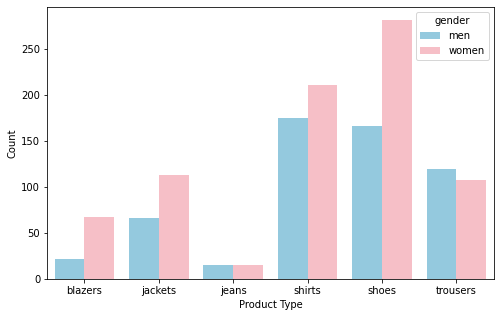

In [ ]:
# take a look at the number of items in each categories 
count = combined_data.groupby(['product_type', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=count, x='product_type', y='count', hue='gender', palette={'men': 'skyblue', 'women': 'lightpink'})
plt.xlabel('Product Type')
plt.ylabel('Count')

The barplots above illustrates the counts across categories and their relative data set. It is clear that jeans and blazers, as mentioned previously, do not have a sufficient or balanced data to reach any conclusion. 

# Ethics & Privacy

Given the all-girl composition of our group, we want to avoid confirmation bias throughout the data collection, cleaning, analysis process, which may lead us to focus on and keep only data that supports our hypothesis while ignoring contradictory evidence.
To avoid this, we need to consider and include datasets that encompass both male and female products with consideration for all the population that should be present under our question. 

In practice, this means to also select datasets from sources that were unrelated to the topic of pink tax, or even ones that contradict the idea that women have to pay more for everyday items, so to obtain all possible perspectives and form an honest, well-rounded analysis. We also need to consider that not all women may be impacted by the Pink Tax equally. For example, the pink tax may disproportionately affect women of color or transgender individuals. We need to ensure that we have an equitable interpretation and collection of data. 

Our personal experiences can introduce subjective biases when communicating our findings. Therefore, in all stages of writing, we would aim to convey findings based on statistical proof and with objective, matter-of-fact language。 

If there is significant evidence in our analysis showing that pink tax does exist, one ethical concern is the tendency in interpretation to blame consumers for supporting and enabling the pink tax by choosing to buy certain higher-priced products. When involving and implying consumer choices as the causing factor of pink tax, the interpretation of our analysis may unintentionally strengthen gender stereotypes regarding appearance maintenance. Therefore, we would also need to consider companies’ perspective of their reactions to differences in production cost and market demand as a factor for our findings. 


# Discussion and Conclusion

In contrast to the "pink tax," we found that, when we compared prices across categories for similar women's and men's clothing products, men's apparel goods at Zara were frequently more costly. For example, men's blazers were over \$40 more on average. Men's items also exhibited greater price variability and wider ranges overall. Some men's jackets cost over $190, whereas no women's jackets exceeded $130.

More precisely, men's jackets, shirts, slacks, and blazers are usually more expensive than similar women's items. There was also greater variety and a larger range of prices for men's items. The majority of women's goods were priced under $70 across categories, exhibiting tighter clusters away from extremes. The assumption that women pay an extra "pink tax" across consumer categories is certainly questionable in this case.

While we initially hypothesized women would pay more in general, the data suggests more complex pricing dynamics are at play in relation to production costs, market demand, and marketing tactics.

Further investigation is needed to understand the reasons for the higher average pricing and greater variability of men's items compared to women's. But this analysis indicates overly simplistic assumptions about uniform gender-based pricing differences should be questioned, at least when it comes to fast fashion companies like Zara.



# Team Contributions

1. Elaine: Project overview, choosing data sets, data overview
2. Michelle: ethics and privacy, data wrangling report and presentation, timeline
3. Yoyo: Analysis and its presentation, Team Expectations and Research Question. 
4. Amber: Hypothesis, EDA and presentation
5. Tracy: Worked on the background, discussion/conclusion, created google slides presentation 
